# Izziv: Analiza besedila o podatkovni znanosti

> *V tej beležnici eksperimentiramo z uporabo različnih URL-jev - Wikipedijskega članka o strojnem učenju. Opazite lahko, da ta članek, za razliko od podatkovne znanosti, vsebuje veliko izrazov, kar analizo otežuje. Moramo najti drug način za čiščenje podatkov po ekstrakciji ključnih besed, da se znebimo nekaterih pogostih, a nepomembnih besednih zvez.*

V tem primeru bomo izvedli preprosto vajo, ki zajema vse korake tradicionalnega procesa podatkovne znanosti. Ni vam treba pisati nobene kode, preprosto kliknite na spodnje celice, da jih izvedete in opazujete rezultat. Kot izziv ste spodbujeni, da to kodo preizkusite z različnimi podatki.

## Cilj

V tej lekciji smo razpravljali o različnih konceptih, povezanih s podatkovno znanostjo. Poskusimo odkriti več povezanih konceptov z uporabo **rudarjenja besedila**. Začeli bomo z besedilom o podatkovni znanosti, iz njega izvlekli ključne besede in nato poskusili vizualizirati rezultat.

Kot besedilo bom uporabil stran o podatkovni znanosti iz Wikipedije:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Korak 1: Pridobivanje podatkov

Prvi korak v vsakem procesu podatkovne znanosti je pridobivanje podatkov. Za to bomo uporabili knjižnico `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Korak 2: Pretvorba podatkov

Naslednji korak je pretvorba podatkov v obliko, primerno za obdelavo. V našem primeru smo prenesli izvorno kodo HTML s strani, ki jo moramo pretvoriti v navadno besedilo.

Obstaja veliko načinov, kako to storiti. Uporabili bomo najpreprostejši vgrajeni objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) iz Pythona. Potrebno je podrazrediti razred `HTMLParser` in definirati kodo, ki bo zbirala vse besedilo znotraj HTML oznak, razen oznak `<script>` in `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Korak 3: Pridobivanje vpogledov

Najpomembnejši korak je, da svoje podatke pretvorimo v obliko, iz katere lahko pridobimo vpoglede. V našem primeru želimo iz besedila izluščiti ključne besede in ugotoviti, katere ključne besede so bolj pomembne.

Uporabili bomo Python knjižnico, imenovano [RAKE](https://github.com/aneesha/RAKE), za ekstrakcijo ključnih besed. Najprej namestimo to knjižnico, če je še nimamo:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Glavna funkcionalnost je na voljo iz objekta `Rake`, ki ga lahko prilagodimo z nekaterimi parametri. V našem primeru bomo nastavili minimalno dolžino ključne besede na 5 znakov, minimalno pogostost ključne besede v dokumentu na 3 in največje število besed v ključni besedi na 2. Prosto eksperimentirajte z drugimi vrednostmi in opazujte rezultat.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Dobimo seznam izrazov skupaj z ustrezno stopnjo pomembnosti. Kot lahko vidite, so najpomembnejše discipline, kot sta strojno učenje in veliki podatki, na vrhu seznama.

## Korak 4: Vizualizacija rezultata

Ljudje podatke najbolje razumejo v vizualni obliki. Zato pogosto smiselno vizualiziramo podatke, da pridobimo določene vpoglede. Za prikaz preproste porazdelitve ključnih besed z njihovo pomembnostjo lahko uporabimo knjižnico `matplotlib` v Pythonu:


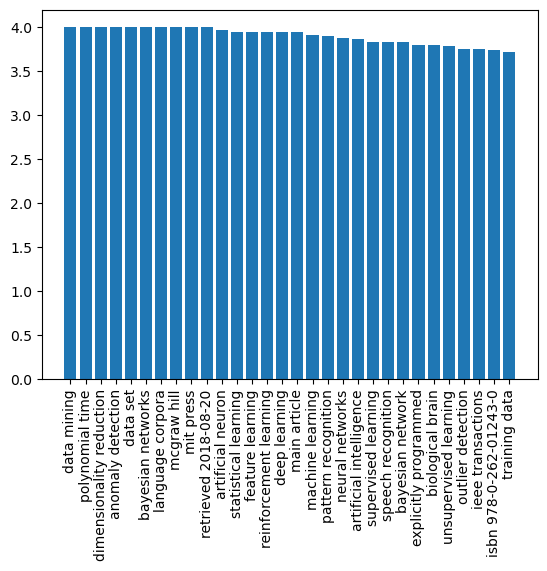

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Vendar pa obstaja še boljši način za vizualizacijo pogostosti besed - z uporabo **oblačka besed**. Za prikaz oblačka besed iz našega seznama ključnih besed bomo morali namestiti še eno knjižnico.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objekt je odgovoren za sprejemanje bodisi izvirnega besedila ali vnaprej izračunanega seznama besed z njihovimi frekvencami in vrne sliko, ki jo je nato mogoče prikazati z uporabo `matplotlib`:


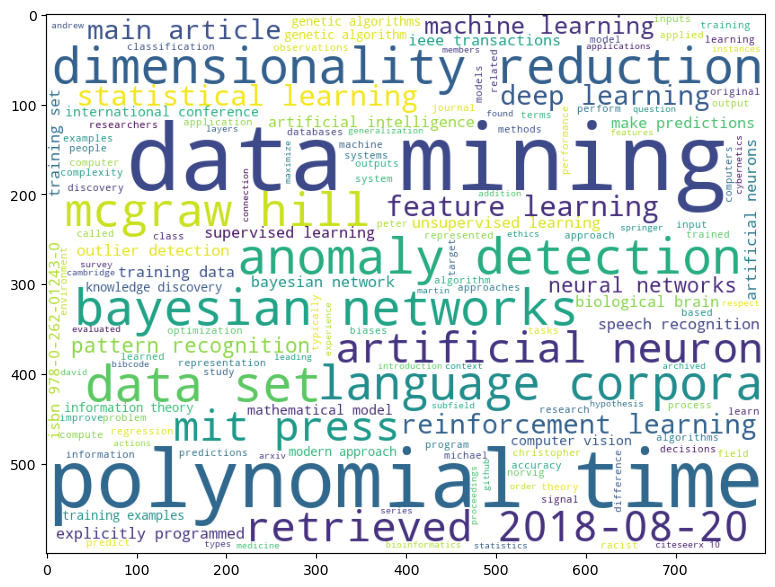

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Prvotno besedilo lahko prav tako posredujemo v `WordCloud` - poglejmo, ali lahko dosežemo podoben rezultat:


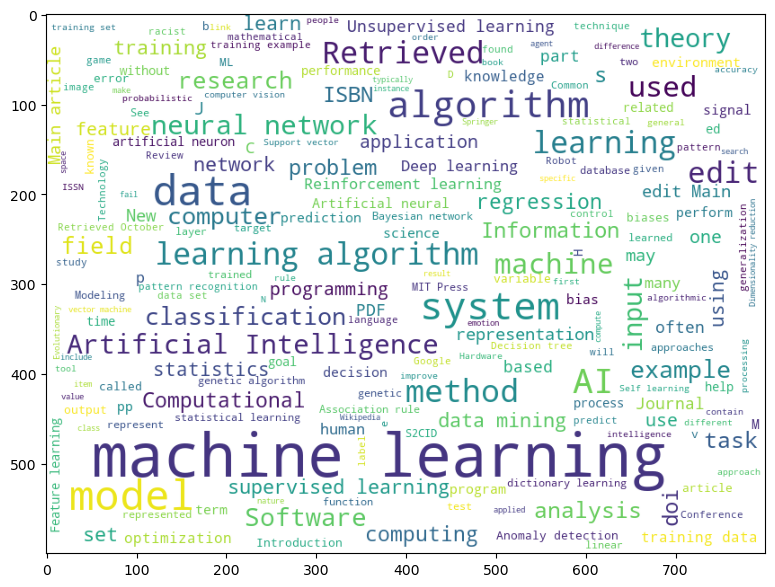

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Zdaj lahko vidimo, da je besedni oblak videti bolj impresiven, vendar vsebuje tudi veliko šuma (npr. nepovezane besede, kot je `Retrieved on`). Prav tako dobimo manj ključnih besed, ki so sestavljene iz dveh besed, kot sta *data scientist* ali *computer science*. To je zato, ker algoritem RAKE veliko bolje izbere dobre ključne besede iz besedila. Ta primer ponazarja pomen predobdelave in čiščenja podatkov, saj nam jasna slika na koncu omogoča sprejemanje boljših odločitev.

V tej vaji smo šli skozi preprost proces pridobivanja pomena iz besedila na Wikipediji v obliki ključnih besed in besednega oblaka. Ta primer je precej preprost, vendar dobro prikazuje vse tipične korake, ki jih podatkovni znanstvenik opravi pri delu s podatki, od pridobivanja podatkov do vizualizacije.

V našem tečaju bomo vse te korake podrobno obravnavali.



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve za strojno prevajanje [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas opozarjamo, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem izvirnem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo strokovno človeško prevajanje. Ne prevzemamo odgovornosti za morebitna nesporazumevanja ali napačne razlage, ki bi izhajale iz uporabe tega prevoda.
